<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/Timeseries/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Time Series Analysis - PJME Energy Consumption**

#**Objective:**

To perform a time series analysis on PJME (PJM East) energy consumption data, aiming to explore trends, seasonality, and laying foundation for building a model to forecast future electricity usage.

#Data Dictionary

Datetime: Timestamps at hourly frequency

PJME_MW: Electricity consumption in megawatts

#Importing necessary libraries

In [25]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading the data

In [26]:
df=pd.read_csv('/content/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


#Exploring data

In [27]:
#Getting idea about to data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


#Converting data type of dataetime and setting as index

In [28]:
#Setting the index and converting it to datetime format
df.set_index('Datetime',inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


#Data Visualization

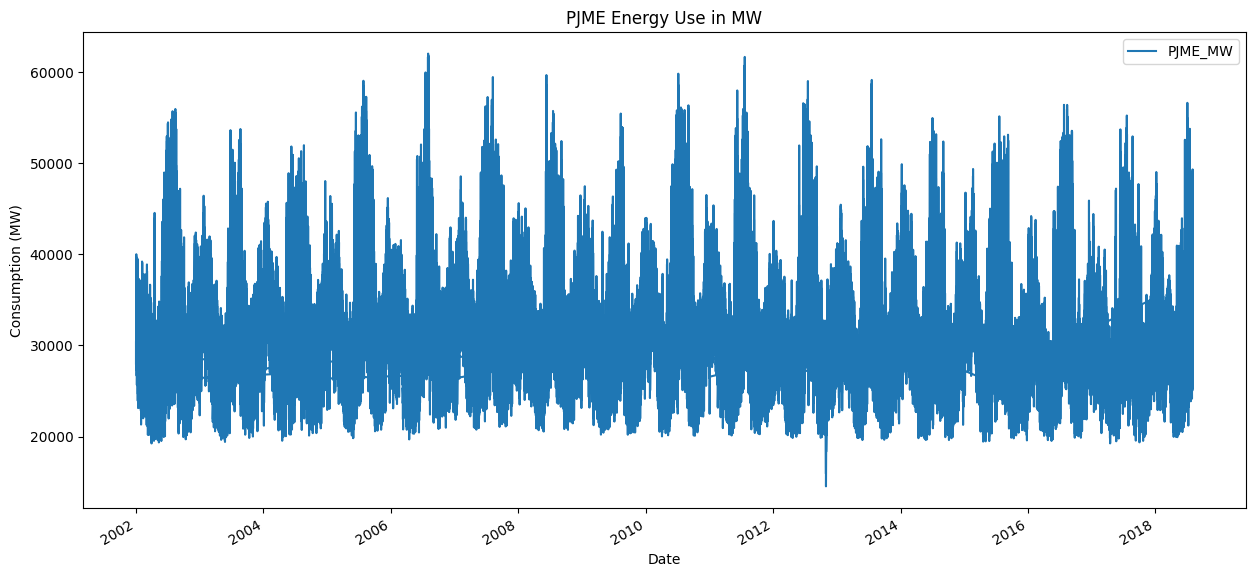

In [29]:
#plot
df.plot(figsize=(15,7),title='PJME Energy Use in MW')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

#Feature Extraction

In [30]:
#Extracting some features
df['year']=[x for x in df.index.year]
df['month']=[x for x in df.index.month]
df=df.reset_index()
df['week'] = df['Datetime'].apply(lambda x : x.week)
df= df.set_index('Datetime')
df['day']=[x for x in df.index.day]
df['hour']=[x for x in df.index.hour]
df['day_str'] =[x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df['day_of_week']=[x.dayofweek for x in df.index]
df.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,31,1,Tue,2002_12,1
2002-12-31 02:00:00,25147.0,2002,12,1,31,2,Tue,2002_12,1
2002-12-31 03:00:00,24574.0,2002,12,1,31,3,Tue,2002_12,1
2002-12-31 04:00:00,24393.0,2002,12,1,31,4,Tue,2002_12,1
2002-12-31 05:00:00,24860.0,2002,12,1,31,5,Tue,2002_12,1


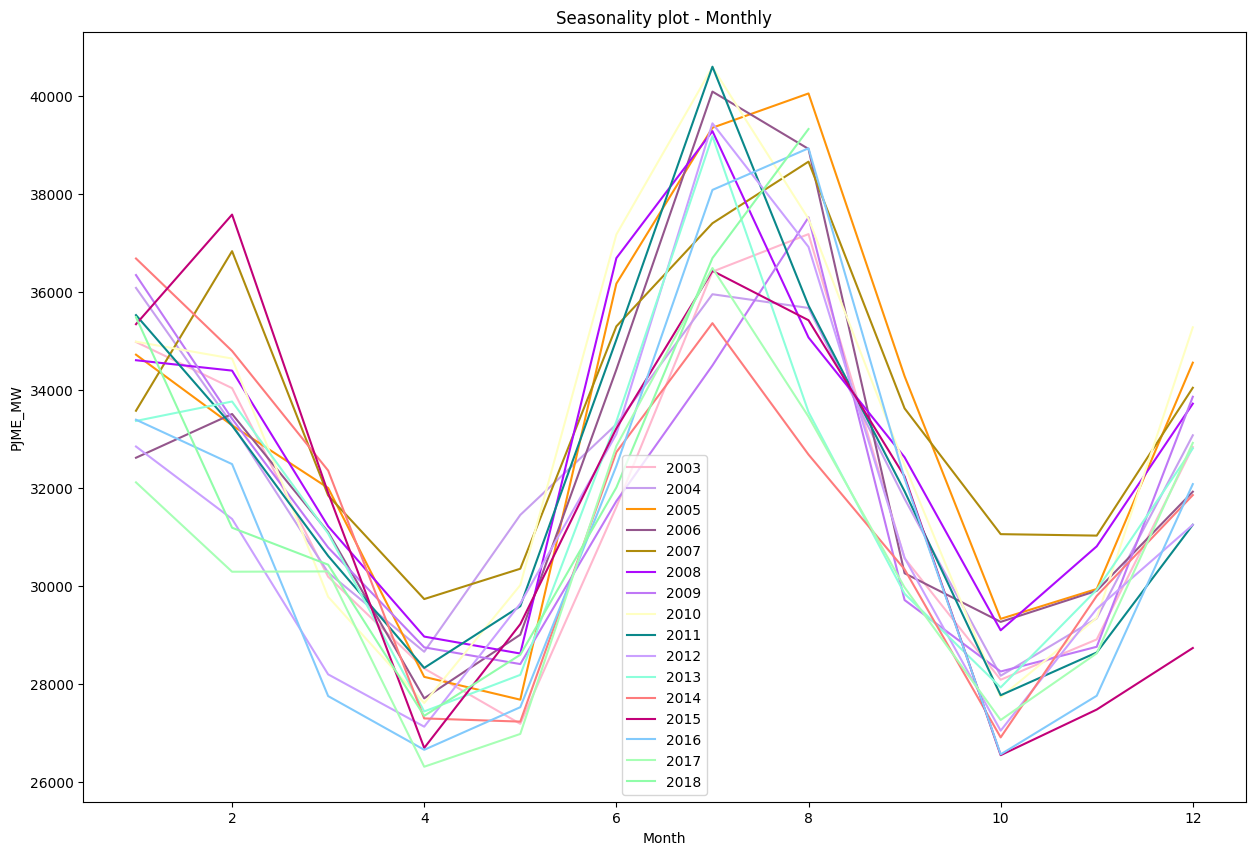

In [31]:
#monthly seasonal plot
import matplotlib
np.random.seed(5)
df_plot= df[['month','year','PJME_MW']].dropna().groupby(['month','year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(years), replace=False)


#plot
plt.figure(figsize =(15,10))
for i, y in enumerate(years):
  if i>0:
    plt.plot('month','PJME_MW', data = df_plot[df_plot['year'] == y], color = colors[i],label = y)


#setting labels
plt.title('Seasonality plot - Monthly')
plt.xlabel('Month')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

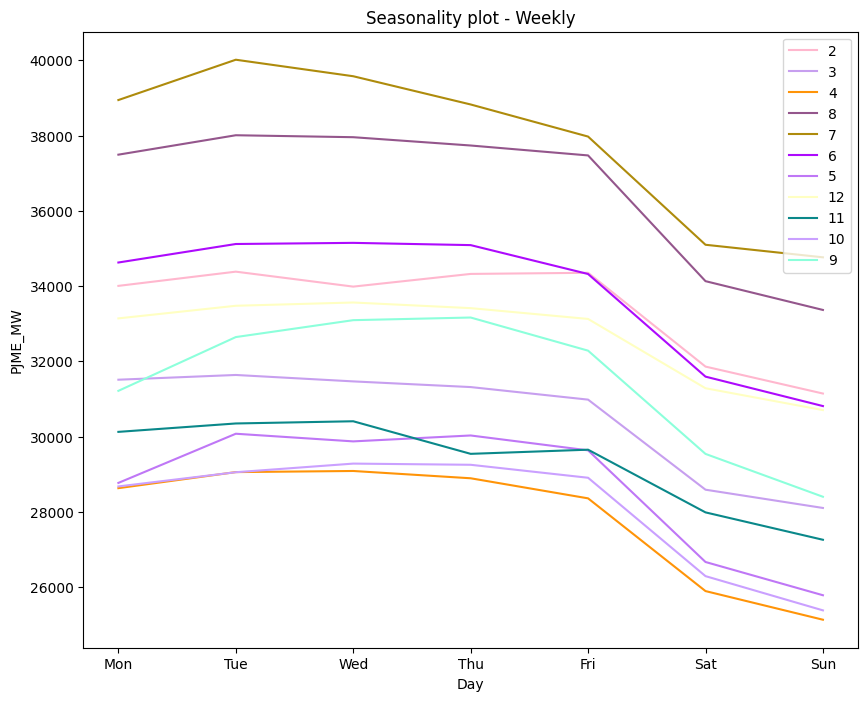

In [32]:
#Weekly seasonal plot
import matplotlib
np.random.seed(5)
df_plot= df[['day_str','month','PJME_MW','day_of_week']].dropna().groupby(['day_str','month','day_of_week']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'day_of_week', ascending = True)
df_plot = df_plot.drop('day_of_week', axis =1)
months = df_plot['month'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(months), replace=False)


#plot
plt.figure(figsize =(10,8))
for i, y in enumerate(months):
  if i>0:
    plt.plot('day_str','PJME_MW', data = df_plot[df_plot['month'] == y], color = colors[i],label = y)

#setting labels
plt.title('Seasonality plot - Weekly')
plt.xlabel('Day')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

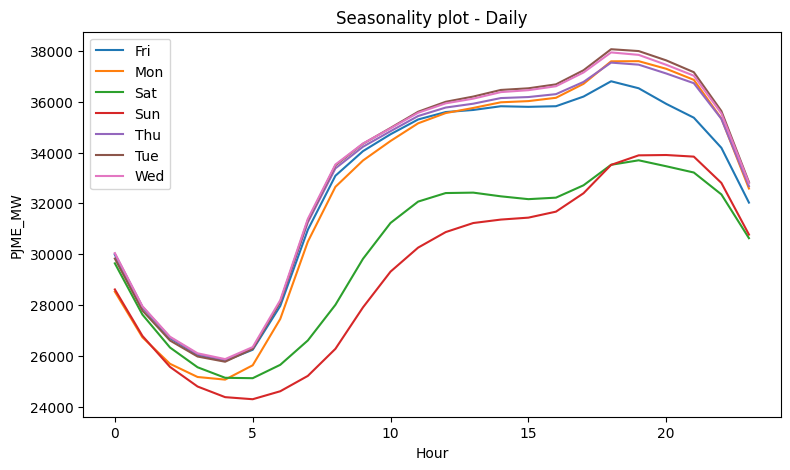

In [33]:
# Daily seasonal plot
import matplotlib
np.random.seed(5)
df_plot= df[['hour','day_str','PJME_MW',]].dropna().groupby(['hour','day_str']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'hour', ascending = True)


#plot using seaborn
plt.figure(figsize =(9,5))
sns.lineplot(x='hour',y='PJME_MW',hue='day_str',data=df_plot, legend =True)
plt.title('Seasonality plot - Daily')
plt.xlabel('Hour')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

#Conclusoins:

1. Yearly consumption plot do not change a lot over years
2. Weekly consumption plot shows that there is heavy usage on weekdays
3. Hourly consumption plot shows that from 05:00 am to 08:00 pm,
there is heavy usage and afterthat it decreases

#Checking Outliers

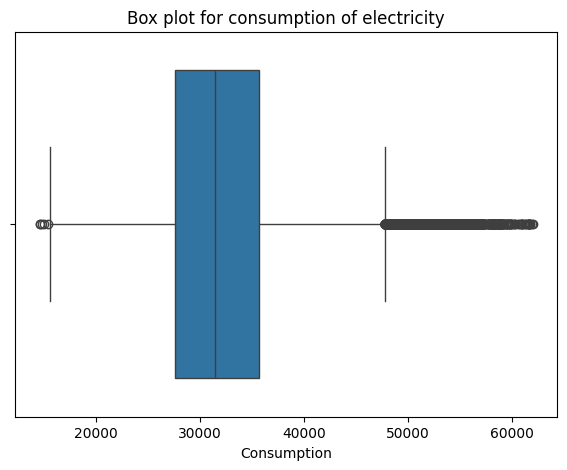

In [34]:
#Box plot for outliers
plt.figure(figsize =(7,5))
sns.boxplot(x= 'PJME_MW', data =df)
plt.xlabel('Consumption')
plt.title('Box plot for consumption of electricity')
plt.show()

**Observation:**

There are outliers in the data

In [35]:
#Filtering the data
df_plot = df[df['year'] >= 2017].reset_index().sort_values(by= 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


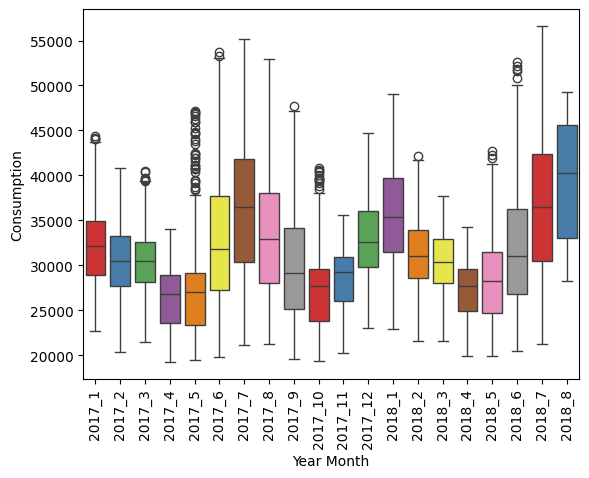

In [36]:
#Boxplot
sns.boxplot(x = 'year_month',y = 'PJME_MW',data = df_plot,palette = 'Set1')
plt.xlabel('Year Month')
plt.ylabel('Consumption')
plt.xticks(rotation = 90)
plt.show()

**Observation:** It seems there is a 'W' seasonal pattern inthe data.

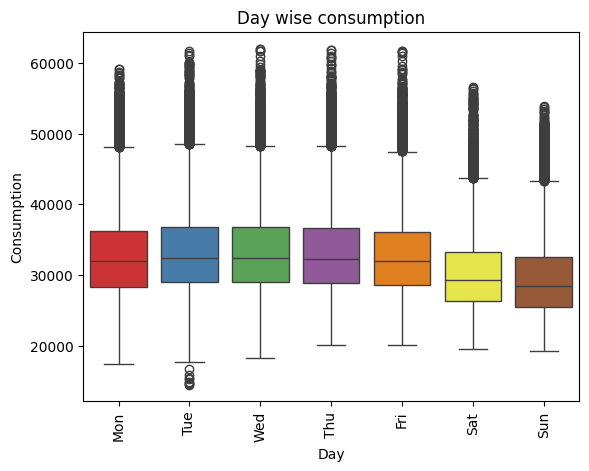

In [37]:
#Boxplot
df_plot = df[['day_str','day_of_week','PJME_MW']].sort_values(by = 'day_of_week')
sns.boxplot( x= 'day_str',y = 'PJME_MW',data = df_plot,palette = 'Set1')
plt.xlabel('Day')
plt.ylabel('Consumption')
plt.title('Day wise consumption')
plt.xticks(rotation = 90)
plt.show()

**Observation:**
* On all the 7 days, there are outliers in right tail.
* We get outliers on left tail only on tuesday.
* Energy consumption is less on weekends.

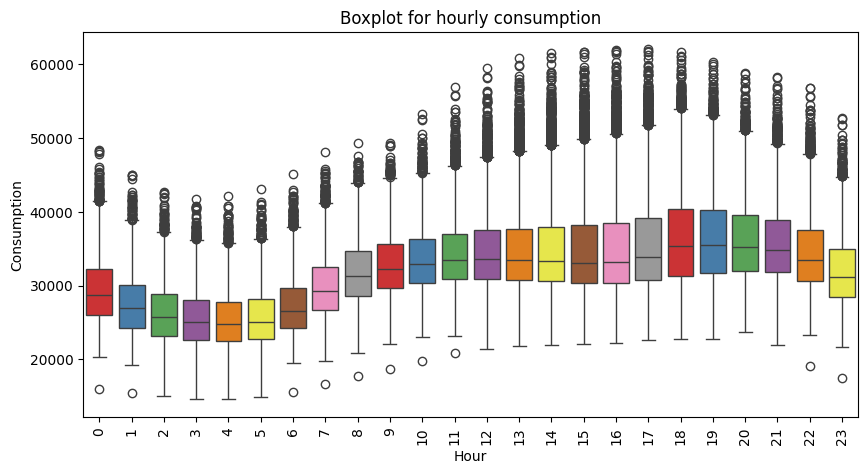

In [38]:
#Boxplot
df_plot = df[['hour','PJME_MW']].sort_values(by = 'hour')
plt.figure(figsize = (10,5))
sns.boxplot( x= 'hour',y = 'PJME_MW',data = df_plot,palette = 'Set1')
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.title('Boxplot for hourly consumption')
plt.xticks(rotation = 90)
plt.show()

**Observation:**
1.Hourly consumption start to increase from 5:00 AM

2.It increases till 10:00 AM and then remains almost in the same range till 8:00 PM

#**Time Series -> trend component + seasonal component + noise component**

Sometimes, there can be more than 1 seasonal component as well.

There are two main type of decomposition : additive and Multiplicative


**Additive-> S + T + R**

**Multiplicative -> S * T * R**


Additive decomposition is best suited for scenarios with constant variance.

Multiplicative decomposition is best suited for scenarios with non-stationary variance.


In [39]:
#Filtering the data

df_plot = df[df['year'] >= 2017].reset_index()
df_plot = df_plot.drop_duplicates(subset =['Datetime']).sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()


,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


In [40]:
#Adding new columns
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6,28171.0,28171.0
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6,26879.0,26879.0
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6,25848.0,25848.0
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6,25039.0,25039.0
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6,24637.0,24637.0


#Seasonal decompose

In [41]:
#Importing 'seasonal_decompose'
from statsmodels.tsa.seasonal import seasonal_decompose

#Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive',period = 24*7)


#Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model = 'multiplicative',period = 24*7)



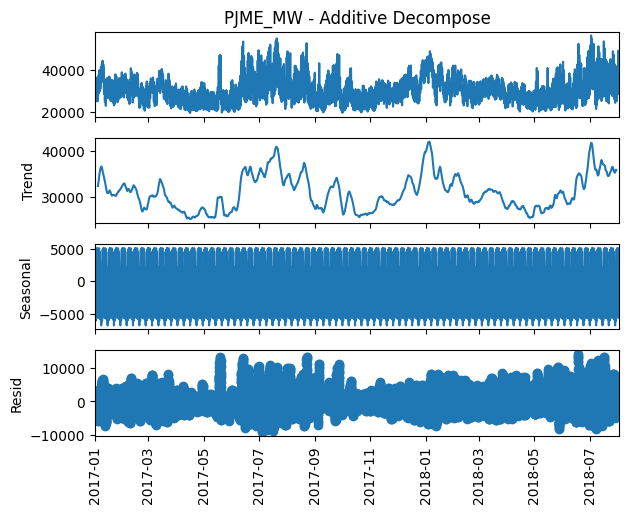

In [42]:
#plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 90)
plt.show()

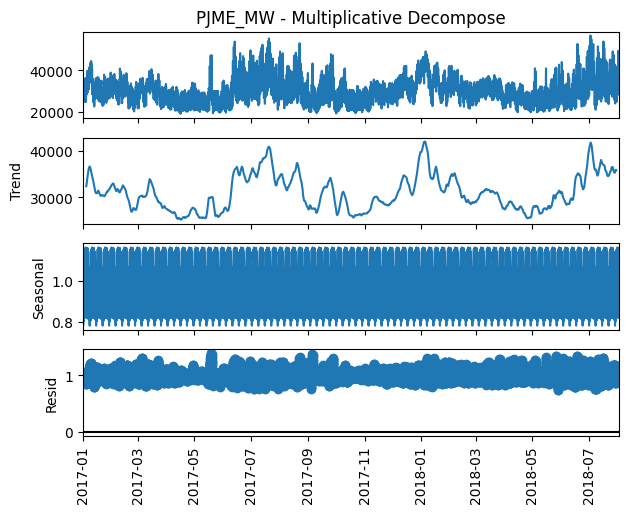

In [43]:
#plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 90)
plt.show()

In [44]:
# Filtering the data
df_plot = df[df['year'] == 2017].reset_index()
df_plot = df_plot[df_plot['month'] == 5]
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot = df_plot.drop_duplicates(subset =['Datetime']).sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-05-01 00:00:00,23949.0,2017,5,18,1,0,Mon,2017_5,0,23949.0,23949.0
2017-05-01 01:00:00,22337.0,2017,5,18,1,1,Mon,2017_5,0,22337.0,22337.0
2017-05-01 02:00:00,21369.0,2017,5,18,1,2,Mon,2017_5,0,21369.0,21369.0
2017-05-01 03:00:00,20850.0,2017,5,18,1,3,Mon,2017_5,0,20850.0,20850.0
2017-05-01 04:00:00,20812.0,2017,5,18,1,4,Mon,2017_5,0,20812.0,20812.0


In [45]:
#Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive',period = 24*7)


#Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model = 'multiplicative',period = 24*7)

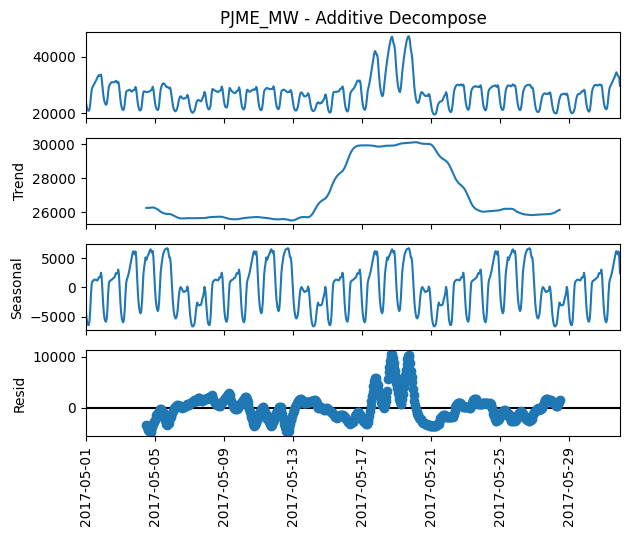

In [46]:
#plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 90)
plt.show()

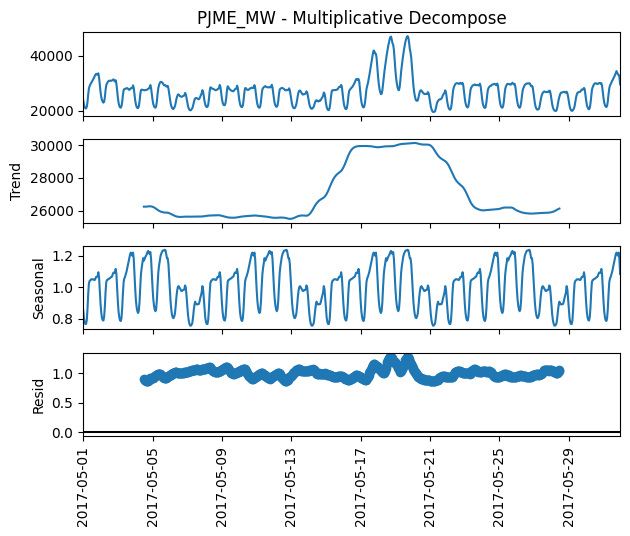

In [47]:
#plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 90)
plt.show()

#Conclusion:

* Based on the above additive and multiplicative plots,
the multiplicative decomposition is a better fit for the "PJME_MW" time series.

* This is primarily because its residuals show a more consistent and stable variance compared to the additive decomposition, whose residuals exhibit increasing variance during periods of high "PJME_MW" values



